# **Let's Begin**

In [1]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/dataset")

## **Sort**

In [2]:
#Sorting the data based on the posting date
df=df.sort_values(['posting_date']).reset_index(drop=True)

Creating a seperate dataframe by extracting all the rows with clear_date as NULL

In [3]:
final_test=pd.DataFrame(df[df['clear_date'].isna()])

In [4]:
test=pd.DataFrame(df[df['clear_date'].isna()])

In [5]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR associates,2019-01-09 00:00:00,2019.0,1.928537e+09,2018-12-30,20181229,20181230,20190114.0,USD,RV,1.0,NaN,2772.34,20181230.0,NAH4,1.928537e+09,0
1,U001,0200769623,WAL-MAR us,2019-01-09 00:00:00,2019.0,1.928533e+09,2018-12-30,20181229,20181230,20190114.0,USD,RV,1.0,NaN,15898.07,20181230.0,NAH4,1.928533e+09,0
2,U001,0200769623,WAL-MAR associates,2019-01-09 00:00:00,2019.0,1.928535e+09,2018-12-30,20181229,20181230,20190114.0,USD,RV,1.0,NaN,55170.17,20181230.0,NAH4,1.928535e+09,0
3,U001,0200769623,WAL-MAR corp,2019-01-09 00:00:00,2019.0,1.928543e+09,2018-12-30,20181230,20181230,20190114.0,USD,RV,1.0,NaN,2987.37,20181230.0,NAH4,1.928543e+09,0
4,U001,CCCA02,KRAFT associates,2019-03-01 00:00:00,2019.0,1.928537e+09,2018-12-30,20181231,20181230,20190203.0,USD,RV,1.0,NaN,17798.40,20181230.0,NAG2,1.928537e+09,0


## **Preprocessing**

In [6]:
#Dropping the rows with clear_date as null from main dataframe
df=df.dropna(subset=['clear_date']).reset_index(drop=True)

In [7]:
#Dropping coloum area_business as all values are null
df=df.drop(columns=['area_business']).reset_index(drop=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           40000 non-null  object 
 1   cust_number             40000 non-null  object 
 2   name_customer           40000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           40000 non-null  float64
 5   doc_id                  40000 non-null  float64
 6   posting_date            40000 non-null  object 
 7   document_create_date    40000 non-null  int64  
 8   document_create_date.1  40000 non-null  int64  
 9   due_in_date             40000 non-null  float64
 10  invoice_currency        40000 non-null  object 
 11  document type           40000 non-null  object 
 12  posting_id              40000 non-null  float64
 13  total_open_amount       40000 non-null  float64
 14  baseline_create_date    40000 non-null

### *Dropping based on Covariance*

In [9]:
df.cov()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,total_open_amount,baseline_create_date,invoice_id,isOpen
buisness_year,1.156073e-01,-1.122147e+06,1.054159e+03,1.065021e+03,1.094738e+03,0.0,-1.938386e+02,1.065564e+03,-1.022368e+06,0.0
doc_id,-1.122147e+06,8.346498e+16,-4.982625e+09,-7.732822e+09,-1.355112e+10,0.0,2.110560e+12,-4.992693e+09,7.786732e+16,0.0
document_create_date,1.054159e+03,-4.982625e+09,1.072207e+07,1.052254e+07,1.013739e+07,0.0,-1.234568e+06,1.050615e+07,-3.882427e+09,0.0
document_create_date.1,1.065021e+03,-7.732822e+09,1.052254e+07,1.064281e+07,1.022931e+07,0.0,-1.493988e+06,1.062638e+07,-6.562737e+09,0.0
due_in_date,1.094738e+03,-1.355112e+10,1.013739e+07,1.022931e+07,1.085155e+07,0.0,-1.850388e+06,1.024835e+07,-1.227405e+10,0.0
posting_id,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0
total_open_amount,-1.938386e+02,2.110560e+12,-1.234568e+06,-1.493988e+06,-1.850388e+06,0.0,1.691761e+09,-1.493369e+06,2.131698e+12,0.0
baseline_create_date,1.065564e+03,-4.992693e+09,1.050615e+07,1.062638e+07,1.024835e+07,0.0,-1.493369e+06,1.064769e+07,-3.821450e+09,0.0
invoice_id,-1.022368e+06,7.786732e+16,-3.882427e+09,-6.562737e+09,-1.227405e+10,0.0,2.131698e+12,-3.821450e+09,7.786732e+16,0.0
isOpen,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0


In [10]:
#Clearly posting_id and isOpen have no covariance, it is better to drop them
df=df.drop(columns=['posting_id', 'isOpen']).reset_index(drop=True)

In [11]:
df=df.drop(columns=['document_create_date']).reset_index(drop=True)

### *Datetime Conversion*

In [12]:
#Converting the dates to standard format, removing time if provided
df['clear_date']=pd.to_datetime(df['clear_date']).dt.date

In [13]:
df['clear_date']=pd.to_datetime(df['clear_date'])

In [14]:
df['due_in_date'] = pd.to_datetime(df['due_in_date'], format='%Y%m%d')
df['baseline_create_date'] = pd.to_datetime(df['baseline_create_date'], format='%Y%m%d')

In [15]:
df['document_create_date.1']=pd.to_datetime(df['document_create_date.1'], format='%Y%m%d', errors='ignore')

In [16]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
0,U001,0200769623,WAL-MAR associates,2019-01-09,2019.0,1.928537e+09,2018-12-30,2018-12-30,2019-01-14,USD,RV,2772.34,2018-12-30,NAH4,1.928537e+09
1,U001,0200769623,WAL-MAR us,2019-01-09,2019.0,1.928533e+09,2018-12-30,2018-12-30,2019-01-14,USD,RV,15898.07,2018-12-30,NAH4,1.928533e+09
2,U001,0200769623,WAL-MAR associates,2019-01-09,2019.0,1.928535e+09,2018-12-30,2018-12-30,2019-01-14,USD,RV,55170.17,2018-12-30,NAH4,1.928535e+09
3,U001,0200769623,WAL-MAR corp,2019-01-09,2019.0,1.928543e+09,2018-12-30,2018-12-30,2019-01-14,USD,RV,2987.37,2018-12-30,NAH4,1.928543e+09
4,U001,CCCA02,KRAFT associates,2019-03-01,2019.0,1.928537e+09,2018-12-30,2018-12-30,2019-02-03,USD,RV,17798.40,2018-12-30,NAG2,1.928537e+09


In [17]:
df['posting_date']=pd.to_datetime(df['posting_date'])

In [18]:
df.corr()

,buisness_year,doc_id,total_open_amount,invoice_id
buisness_year,1.000000,-0.011424,-0.013860,-0.010775
doc_id,-0.011424,1.000000,0.177614,1.000000
total_open_amount,-0.013860,0.177614,1.000000,0.185724
invoice_id,-0.010775,1.000000,0.185724,1.000000


In [19]:
df=df.drop(columns=['invoice_id']).reset_index(drop=True)

In [20]:
df['delay']=pd.to_numeric((df['clear_date'].dt.date-df['due_in_date'].dt.date).dt.days, downcast='integer')

In [21]:
df.drop_duplicates(keep='first', inplace=True)

In [22]:
df=df.drop(columns=['document type']).reset_index(drop=True)

In [23]:
#all unique
df=df.drop(columns=['doc_id']).reset_index(drop=True)

## **Spliting data for train, validation and test** 

In [24]:
X=df.drop('delay', axis=1)
y=df['delay']

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_inter_test,y_train,y_inter_test = train_test_split(X,y,test_size=0.3,random_state=0 , shuffle = False)

In [26]:
X_val,X_test,y_val,y_test = train_test_split(X_inter_test,y_inter_test,test_size=0.5,random_state=0 , shuffle = False)

In [27]:
X_train.shape , X_val.shape , X_test.shape

((27392, 12), (5870, 12), (5870, 12))

## **EDA**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


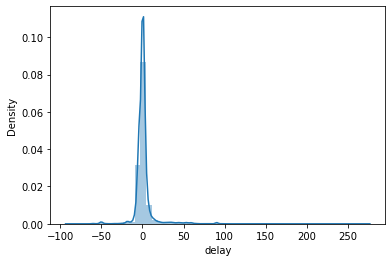

In [28]:
#Seaborn distplot lets you show a histogram with a line on it. This can be shown in all kinds of variations.
import seaborn as sns
sns.distplot(y_train)

Here we can see that the data is a bit right skewed and also seems like we shall remove some outliers

In [29]:
y_train.value_counts()

 0      5797
 1      3291
 2      2875
-5      2024
-4      1817
        ... 
 87        1
 103       1
-72        1
-76        1
 72        1
Name: delay, Length: 168, dtype: int64

In [30]:
import  matplotlib.pyplot as plt
import numpy as np

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Days')

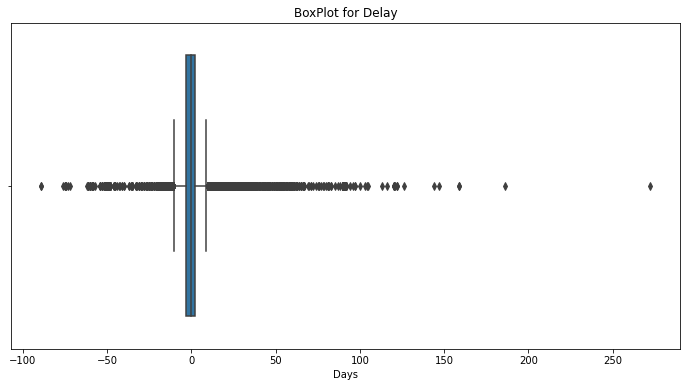

In [31]:
#A box plot/box-and-whisker plot shows the distribution of data in a way that facilitates comparisons between variables or across levels of a categorical variable
#This plot helps us verify whether we actually have outliers, if yes how many and in what range 
plt.figure(figsize = (12,6))
sns.boxplot(y_train)
plt.title('BoxPlot for Delay')
plt.xlabel("Days")

In [32]:
X_train=X_train.merge(y_train,on = X_train.index)

### Removing Outliers

In [33]:
#The delay more than 120 and also less tha -60 appear to be outlier based on tha boxplot
X_train=X_train[X_train['delay']<120]
X_train=X_train[X_train['delay']>-60]

In [34]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27356 entries, 0 to 27391
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   key_0                   27356 non-null  int64         
 1   business_code           27356 non-null  object        
 2   cust_number             27356 non-null  object        
 3   name_customer           27356 non-null  object        
 4   clear_date              27356 non-null  datetime64[ns]
 5   buisness_year           27356 non-null  float64       
 6   posting_date            27356 non-null  datetime64[ns]
 7   document_create_date.1  27356 non-null  datetime64[ns]
 8   due_in_date             27356 non-null  datetime64[ns]
 9   invoice_currency        27356 non-null  object        
 10  total_open_amount       27356 non-null  float64       
 11  baseline_create_date    27356 non-null  datetime64[ns]
 12  cust_payment_terms      27356 non-null  object

In [35]:
y_train = X_train['delay']
X_train = X_train.drop('delay', axis=1)

In [36]:
X_train=X_train.drop('key_0', axis=1)

In [37]:
X_train.reset_index(drop=True)

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
0,U001,0200769623,WAL-MAR associates,2019-01-09,2019.0,2018-12-30,2018-12-30,2019-01-14,USD,2772.34,2018-12-30,NAH4
1,U001,0200769623,WAL-MAR us,2019-01-09,2019.0,2018-12-30,2018-12-30,2019-01-14,USD,15898.07,2018-12-30,NAH4
2,U001,0200769623,WAL-MAR associates,2019-01-09,2019.0,2018-12-30,2018-12-30,2019-01-14,USD,55170.17,2018-12-30,NAH4
3,U001,0200769623,WAL-MAR corp,2019-01-09,2019.0,2018-12-30,2018-12-30,2019-01-14,USD,2987.37,2018-12-30,NAH4
4,U001,CCCA02,KRAFT associates,2019-03-01,2019.0,2018-12-30,2018-12-30,2019-02-03,USD,17798.40,2018-12-30,NAG2
...,...,...,...,...,...,...,...,...,...,...,...,...
27351,CA02,0140104240,FEDER us,2019-10-23,2019.0,2019-10-08,2019-10-08,2019-10-25,CAD,225708.70,2019-10-15,CA10
27352,U001,0200793568,SUPE corp,2019-10-24,2019.0,2019-10-08,2019-10-08,2019-10-23,USD,22394.71,2019-10-08,NAA8
27353,U001,0200707822,PUBLI associates,2019-10-23,2019.0,2019-10-08,2019-10-08,2019-10-23,USD,125281.24,2019-10-08,NAA8
27354,U001,0200777735,NASH corp,2019-10-22,2019.0,2019-10-08,2019-10-08,2019-10-23,USD,8608.49,2019-10-08,NAA8


## **Feature Engg**

In [38]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27356 entries, 0 to 27391
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           27356 non-null  object        
 1   cust_number             27356 non-null  object        
 2   name_customer           27356 non-null  object        
 3   clear_date              27356 non-null  datetime64[ns]
 4   buisness_year           27356 non-null  float64       
 5   posting_date            27356 non-null  datetime64[ns]
 6   document_create_date.1  27356 non-null  datetime64[ns]
 7   due_in_date             27356 non-null  datetime64[ns]
 8   invoice_currency        27356 non-null  object        
 9   total_open_amount       27356 non-null  float64       
 10  baseline_create_date    27356 non-null  datetime64[ns]
 11  cust_payment_terms      27356 non-null  object        
dtypes: datetime64[ns](5), float64(2), object(5)
me

In [39]:
#Class for specifically performing label encoding
from sklearn.preprocessing import LabelEncoder

class LabelEncoderExt(object):
    def __init__(self):
        """
        It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]
        Unknown will be added in fit and transform will take care of new item. It gives unknown class id
        """
        self.label_encoder = LabelEncoder()
        # self.classes_ = self.label_encoder.classes_

    def fit(self, data_list):
        """
        This will fit the encoder for all the unique values and introduce unknown value
        :param data_list: A list of string
        :return: self
        """
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_

        return self

    def transform(self, data_list):
        """
        This will transform the data_list to id list where the new values get assigned to Unknown class
        :param data_list:
        :return:
        """
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]

        return self.label_encoder.transform(new_data_list)

Encoding all the object type values into int64 type

In [40]:
business_encoder = LabelEncoderExt()
business_encoder.fit(X_train['business_code'])
X_train['business_code'] = business_encoder.transform(X_train['business_code'])
X_val['business_code'] = business_encoder.transform(X_val['business_code'])
X_test['business_code'] = business_encoder.transform(X_test['business_code'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [41]:
cust_encoder = LabelEncoderExt()
cust_encoder.fit(X_train['cust_number'])
X_train['cust_number'] = cust_encoder.transform(X_train['cust_number'].astype('str'))
X_val['cust_number'] = cust_encoder.transform(X_val['cust_number'].astype('str'))
X_test['cust_number'] = cust_encoder.transform(X_test['cust_number'].astype('str'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [42]:
payment_encoder = LabelEncoderExt()
payment_encoder.fit(X_train['cust_payment_terms'])
X_train['cust_payment_terms'] = payment_encoder.transform(X_train['cust_payment_terms'].astype('str'))
X_val['cust_payment_terms'] = payment_encoder.transform(X_val['cust_payment_terms'].astype('str'))
X_test['cust_payment_terms'] = payment_encoder.transform(X_test['cust_payment_terms'].astype('str'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [43]:
cust_name = LabelEncoderExt()
cust_name.fit(X_train['name_customer'])
X_train['name_customer'] = cust_name.transform(X_train['name_customer'].astype('str'))
X_val['name_customer'] = cust_name.transform(X_val['name_customer'].astype('str'))
X_test['name_customer'] = cust_name.transform(X_test['name_customer'].astype('str'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [44]:
incenc = LabelEncoderExt()
incenc.fit(X_train['invoice_currency'])
X_train['invoice_currency'] = incenc.transform(X_train['invoice_currency'].astype('str'))
X_val['invoice_currency'] = incenc.transform(X_val['invoice_currency'].astype('str'))
X_test['invoice_currency'] = incenc.transform(X_test['invoice_currency'].astype('str'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [45]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27356 entries, 0 to 27391
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           27356 non-null  int64         
 1   cust_number             27356 non-null  int64         
 2   name_customer           27356 non-null  int64         
 3   clear_date              27356 non-null  datetime64[ns]
 4   buisness_year           27356 non-null  float64       
 5   posting_date            27356 non-null  datetime64[ns]
 6   document_create_date.1  27356 non-null  datetime64[ns]
 7   due_in_date             27356 non-null  datetime64[ns]
 8   invoice_currency        27356 non-null  int64         
 9   total_open_amount       27356 non-null  float64       
 10  baseline_create_date    27356 non-null  datetime64[ns]
 11  cust_payment_terms      27356 non-null  int64         
dtypes: datetime64[ns](5), float64(2), int64(5)
mem

## **Feature Selection**

In [46]:
#Feature due_time is the time from the posting_date to the due_in_date
X_train['due_time']=pd.to_numeric((X_train['due_in_date'].dt.date-X_train['posting_date'].dt.date).dt.days, downcast='integer')
X_val['due_time']=pd.to_numeric((X_val['due_in_date'].dt.date-X_val['posting_date'].dt.date).dt.days, downcast='integer')
X_test['due_time']=pd.to_numeric((X_test['due_in_date'].dt.date-X_test['posting_date'].dt.date).dt.days, downcast='integer')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [47]:
#Only 2 distinct values
X_train=X_train.drop(columns=['buisness_year']).reset_index(drop=True)

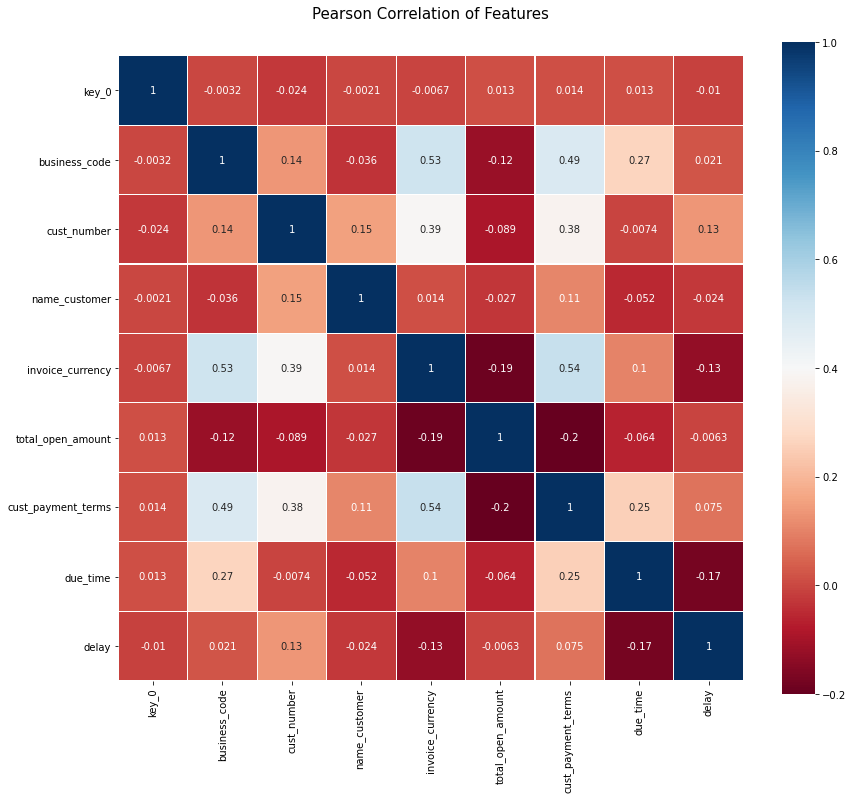

In [48]:
#plotting the heat map
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

It is difficult to select some features in specific by looking at the heatmap, hence taking all features into account

In [49]:
#Datetime values can not be fed during model prediction, hence dropping these values
X_train=X_train.drop(columns=['clear_date', 'posting_date', 'document_create_date.1', 'due_in_date', 'baseline_create_date']).reset_index(drop=True)

## **Modelling**

In [50]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR

In [51]:
from xgboost import XGBRegressor
models = []

Trying different models

In [52]:
models.append(('Linear', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso',Lasso()))
models.append(('SGD', SGDRegressor()))
models.append(('EN',ElasticNet()))
models.append(('Dt',DecisionTreeRegressor()))
models.append(('KNR',KNeighborsRegressor()))
models.append(('GBR', GradientBoostingRegressor(random_state=1)))
models.append(('XGB',XGBRegressor(random_state=1)))
results = []
names = []

In [53]:
#Tranforming X_val dataframe to match X_train  
X_val=X_val.drop(columns=['buisness_year']).reset_index(drop=True)

In [54]:
X_val=X_val.drop(columns=['clear_date', 'posting_date', 'document_create_date.1', 'due_in_date', 'baseline_create_date']).reset_index(drop=True)

In [55]:
X_train.shape, X_val.shape

((27356, 7), (5870, 7))

In [56]:
X_train.dtypes, X_val.dtypes

(business_code           int64
 cust_number             int64
 name_customer           int64
 invoice_currency        int64
 total_open_amount     float64
 cust_payment_terms      int64
 due_time                 int8
 dtype: object, business_code           int64
 cust_number             int64
 name_customer           int64
 invoice_currency        int64
 total_open_amount     float64
 cust_payment_terms      int64
 due_time                 int8
 dtype: object)

In [57]:
from sklearn.metrics import mean_squared_error
for name, model in models:
    model.fit(X_train,y_train)
    y_pred=model.predict(X_val)
    rms=mean_squared_error(y_val, y_pred, squared=False)
    print(name," : ",rms)

Linear  :  6.553413599219632
Ridge  :  6.552995498007806
Lasso  :  6.617283678888947
SGD  :  2.353118812459852e+17
EN  :  6.614655327000778
Dt  :  8.347323617978686
KNR  :  7.132686952940959
GBR  :  5.638139957021515
[18:38:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGB  :  6.0161066


## **Parameter Tuning**

RMS values of XGB and GBR look optimal

In [58]:
#Performing hyper parameter tuning for xgb
from sklearn.model_selection import GridSearchCV
def hyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.1, 0.05],
        'max_depth': [6, 8, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
    }

    xgb_model = XGBRegressor()                   

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

In [59]:
#hyperParameterTuning(X_train, y_train)

In [60]:
#Performing hyper parameter tuning for gbr
def hyperParameterTuningGBR(X_train, y_train):
    param_tuning = {
        'loss':['ls', 'huber'],
        'learning_rate': [0.01, 0.1 , 0.05],
        'n_estimators': [500, 1000, 1200],
        'min_samples_split':[2, 100, 200],
        'min_samples_leaf':[1, 5, 20],
        'subsample':[1.0],
        'max_depth': [3, 5, 7],
        'max_features':['sqrt']
    }

    gbr_model = GradientBoostingRegressor()                   

    gsearch = GridSearchCV(estimator = gbr_model,
                           param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

In [61]:
#hyperParameterTuningGBR(X_train, y_train)

In [62]:
#Tranforming X_test dataframe to match X_train  
X_test=X_test.drop(columns=['buisness_year']).reset_index(drop=True)
X_test=X_test.drop(columns=['clear_date', 'posting_date', 'document_create_date.1', 'due_in_date', 'baseline_create_date']).reset_index(drop=True)

In [63]:
#Running the GBR model based on the parameters being found out from grid search
params={'learning_rate': 0.05,
        'loss': 'huber',
        'max_depth': 5,
        'max_features': 'sqrt',
        'min_samples_leaf': 1,
        'min_samples_split': 2,
        'n_estimators': 1000,
        'random_state': 1,
        'subsample': 1.0
        }
gbr_model=GradientBoostingRegressor(**params)
gbr_model.fit(X_val,y_val)
y_pred1=gbr_model.predict(X_val)
rms1=mean_squared_error(y_val, y_pred1, squared=False)
print(rms1)

3.0586302360845847


In [64]:
#Running the XGB model based on the parameters being found out from grid search
params2={'colsample_bytree': 0.5,
        'learning_rate': 0.01,
        'max_depth': 5,
        'min_child_weight': 5,
        'n_estimators': 500,
        'objective': 'reg:squarederror',
        'subsample': 1.0,
        'random_state': 1
        }
xgb_model=XGBRegressor(**params2)

In [65]:
xgb_model.fit(X_val,y_val)
y_pred_val=xgb_model.predict(X_val)
rms_val=mean_squared_error(y_val, y_pred_val, squared=False)
print(rms_val)

4.3342047


The RMS score for the GBR model to too less, XGB is a better choice

In [66]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
y_pred_xgb=xgb_model.predict(X_val)
rms=mean_squared_error(y_val, y_pred_xgb, squared=False)
mae=mean_absolute_error(y_val, y_pred_xgb)
r2=r2_score(y_val, y_pred_xgb)
print('Final RMS = ',rms),print('Final MAE = ',mae),print('R2 = ',r2)

Final RMS =  4.3342047
Final MAE =  2.4343667
R2 =  0.6066869804365669


(None, None, None)

In [67]:
xgb_model.fit(X_test,y_test)
y_pred2=xgb_model.predict(X_test)
rms_test=mean_squared_error(y_test, y_pred2, squared=False)
print(rms_test)

6.0594335


## **Clearly XGB has a better overall RMS, hence this model can be chosen for prediction**

# ***Let's now move towards making prediction***

## **Preprocessing on test dataframe**

In [68]:
#Tranforming test dataframe to match X_train  
test=test.drop(columns=['invoice_id', 'doc_id', 'document_create_date', 'document type']).reset_index(drop=True)

In [69]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           10000 non-null  object 
 1   cust_number             10000 non-null  object 
 2   name_customer           10000 non-null  object 
 3   clear_date              0 non-null      object 
 4   buisness_year           10000 non-null  float64
 5   posting_date            10000 non-null  object 
 6   document_create_date.1  10000 non-null  int64  
 7   due_in_date             10000 non-null  float64
 8   invoice_currency        10000 non-null  object 
 9   posting_id              10000 non-null  float64
 10  area_business           0 non-null      float64
 11  total_open_amount       10000 non-null  float64
 12  baseline_create_date    10000 non-null  float64
 13  cust_payment_terms      10000 non-null  object 
 14  isOpen                  10000 non-null 

In [70]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5870 entries, 0 to 5869
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   business_code       5870 non-null   int64  
 1   cust_number         5870 non-null   int64  
 2   name_customer       5870 non-null   int64  
 3   invoice_currency    5870 non-null   int64  
 4   total_open_amount   5870 non-null   float64
 5   cust_payment_terms  5870 non-null   int64  
 6   due_time            5870 non-null   int8   
dtypes: float64(1), int64(5), int8(1)
memory usage: 281.0 KB


In [71]:
test=test.drop(columns=['isOpen', 'posting_id']).reset_index(drop=True)

## **Feature Engg on test**

In [72]:
#Encoding all the object type values to int64 for test dataframe
test['business_code'] = business_encoder.transform(test['business_code'])
test['cust_number'] = cust_encoder.transform(test['cust_number'].astype('str'))
test['cust_payment_terms'] = payment_encoder.transform(test['cust_payment_terms'].astype('str'))
test['name_customer'] = cust_name.transform(test['name_customer'].astype('str'))
test['invoice_currency'] = incenc.transform(test['invoice_currency'].astype('str'))

In [73]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           10000 non-null  int64  
 1   cust_number             10000 non-null  int64  
 2   name_customer           10000 non-null  int64  
 3   clear_date              0 non-null      object 
 4   buisness_year           10000 non-null  float64
 5   posting_date            10000 non-null  object 
 6   document_create_date.1  10000 non-null  int64  
 7   due_in_date             10000 non-null  float64
 8   invoice_currency        10000 non-null  int64  
 9   area_business           0 non-null      float64
 10  total_open_amount       10000 non-null  float64
 11  baseline_create_date    10000 non-null  float64
 12  cust_payment_terms      10000 non-null  int64  
dtypes: float64(5), int64(6), object(2)
memory usage: 1015.8+ KB


## **Feature Selection on test**

In [74]:
#coverting the dates to same format as on the other dataframes
test['clear_date']=pd.to_datetime(test['clear_date'])
test['due_in_date'] = pd.to_datetime(test['due_in_date'], format='%Y%m%d')
test['baseline_create_date'] = pd.to_datetime(test['baseline_create_date'], format='%Y%m%d')
test['posting_date']=pd.to_datetime(test['posting_date'])
test['document_create_date.1']=pd.to_datetime(test['document_create_date.1'], format='%Y%m%d', errors='ignore')

In [75]:
#Adding the same feature to the dataframe as added in X_train, X_val, X_test
test['due_time']=pd.to_numeric((test['due_in_date'].dt.date-test['posting_date'].dt.date).dt.days, downcast='integer')

In [76]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           10000 non-null  int64         
 1   cust_number             10000 non-null  int64         
 2   name_customer           10000 non-null  int64         
 3   clear_date              0 non-null      datetime64[ns]
 4   buisness_year           10000 non-null  float64       
 5   posting_date            10000 non-null  datetime64[ns]
 6   document_create_date.1  10000 non-null  datetime64[ns]
 7   due_in_date             10000 non-null  datetime64[ns]
 8   invoice_currency        10000 non-null  int64         
 9   area_business           0 non-null      float64       
 10  total_open_amount       10000 non-null  float64       
 11  baseline_create_date    10000 non-null  datetime64[ns]
 12  cust_payment_terms      10000 non-null  int64  

In [77]:
test=test.drop(columns=['area_business', 'buisness_year', 'clear_date', 'posting_date', 'document_create_date.1', 'due_in_date', 'baseline_create_date']).reset_index(drop=True)

In [78]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27356 entries, 0 to 27355
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   business_code       27356 non-null  int64  
 1   cust_number         27356 non-null  int64  
 2   name_customer       27356 non-null  int64  
 3   invoice_currency    27356 non-null  int64  
 4   total_open_amount   27356 non-null  float64
 5   cust_payment_terms  27356 non-null  int64  
 6   due_time            27356 non-null  int8   
dtypes: float64(1), int64(5), int8(1)
memory usage: 1.3 MB


In [79]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   business_code       10000 non-null  int64  
 1   cust_number         10000 non-null  int64  
 2   name_customer       10000 non-null  int64  
 3   invoice_currency    10000 non-null  int64  
 4   total_open_amount   10000 non-null  float64
 5   cust_payment_terms  10000 non-null  int64  
 6   due_time            10000 non-null  int8   
dtypes: float64(1), int64(5), int8(1)
memory usage: 478.6 KB


## **Prediction**

In [80]:
y_pred_xgb=xgb_model.predict(test)
y_pred_xgb=pd.Series(y_pred_xgb,name='delay')
Final_xgb = final_test.merge(y_pred_xgb , on = test.index )

In [81]:
#Binning the values as per delay
bins_s=[-100,-1,15,30,45,60,500]
labels_s=['<0','0-15','16-30','31-45','46-60','>60']
Final_xgb['delay_in_bins']=pd.cut(Final_xgb['delay'],bins=bins_s,labels=labels_s)
Final_xgb

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay,delay_in_bins
0,0,U001,0200782001,GORDO associates,NaN,2020.0,1.930580e+09,2020-02-27,20200227,20200227,20200313.0,USD,RV,1.0,NaN,21863.80,20200227.0,NAA8,1.930580e+09,1,0.618550,0-15
1,1,U001,0200748108,KROGER systems,NaN,2020.0,1.930571e+09,2020-02-27,20200226,20200227,20200313.0,USD,RV,1.0,NaN,51827.85,20200227.0,NAA8,1.930571e+09,1,0.952276,0-15
2,2,CA02,0140104429,COSTCO corporation,NaN,2020.0,2.960617e+09,2020-02-27,20200227,20200227,20200309.0,CAD,RV,1.0,NaN,41239.38,20200228.0,CA10,2.960617e+09,1,5.397031,0-15
3,3,U001,0200764795,SYSCO in,NaN,2020.0,1.930580e+09,2020-02-27,20200228,20200227,20200313.0,USD,RV,1.0,NaN,6830.97,20200227.0,NAA8,1.930580e+09,1,1.080835,0-15
4,4,U001,CCU013,KRAFT F co,NaN,2020.0,1.930568e+09,2020-02-27,20200225,20200227,20200227.0,USD,RV,1.0,NaN,8745.15,20200227.0,NAX2,1.930568e+09,1,41.371975,31-45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,CA02,0140104392,FLANAG us,NaN,2020.0,2.960635e+09,2020-05-14,20200514,20200514,20200524.0,CAD,RV,1.0,NaN,3750.83,20200514.0,CA10,2.960635e+09,1,4.510490,0-15
9996,9996,U001,0200915438,GROC corporation,NaN,2020.0,1.930905e+09,2020-05-15,20200515,20200515,20200530.0,USD,RV,1.0,NaN,24212.00,20200515.0,NAA8,1.930905e+09,1,0.669090,0-15
9997,9997,CA02,0140105785,SHOPPE in,NaN,2020.0,2.960636e+09,2020-05-19,20200519,20200519,20200529.0,CAD,RV,1.0,NaN,1373.60,20200519.0,CA10,2.960636e+09,1,8.235074,0-15
9998,9998,U001,200956366,RICH systems,NaN,2020.0,1.930910e+09,2020-05-21,20200516,20200521,20200605.0,USD,RV,1.0,NaN,42360.00,20200521.0,NAA8,1.930910e+09,1,8.258457,0-15


Text(0, 0.5, 'counts')

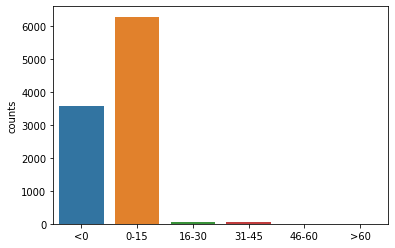

In [82]:
#Graph representation of the data as per delay in payment
counts=Final_xgb.delay_in_bins.value_counts()
counts.sort_index(inplace=True)

sns.barplot(x = counts.index, y = counts)
plt.ylabel('counts')

In [83]:
#predicting clear_date
Final_xgb['due_in_date'] = pd.to_datetime(Final_xgb['due_in_date'], format='%Y%m%d')
Final_xgb['clear_date_prediction']=Final_xgb['due_in_date'] + pd.to_timedelta(Final_xgb['delay'],unit='d')
Final_xgb['clear_date_prediction'] = pd.to_datetime(Final_xgb['clear_date_prediction']).dt.date

In [84]:
Final_xgb

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay,delay_in_bins,clear_date_prediction
0,0,U001,0200782001,GORDO associates,NaN,2020.0,1.930580e+09,2020-02-27,20200227,20200227,2020-03-13,USD,RV,1.0,NaN,21863.80,20200227.0,NAA8,1.930580e+09,1,0.618550,0-15,2020-03-13
1,1,U001,0200748108,KROGER systems,NaN,2020.0,1.930571e+09,2020-02-27,20200226,20200227,2020-03-13,USD,RV,1.0,NaN,51827.85,20200227.0,NAA8,1.930571e+09,1,0.952276,0-15,2020-03-13
2,2,CA02,0140104429,COSTCO corporation,NaN,2020.0,2.960617e+09,2020-02-27,20200227,20200227,2020-03-09,CAD,RV,1.0,NaN,41239.38,20200228.0,CA10,2.960617e+09,1,5.397031,0-15,2020-03-14
3,3,U001,0200764795,SYSCO in,NaN,2020.0,1.930580e+09,2020-02-27,20200228,20200227,2020-03-13,USD,RV,1.0,NaN,6830.97,20200227.0,NAA8,1.930580e+09,1,1.080835,0-15,2020-03-14
4,4,U001,CCU013,KRAFT F co,NaN,2020.0,1.930568e+09,2020-02-27,20200225,20200227,2020-02-27,USD,RV,1.0,NaN,8745.15,20200227.0,NAX2,1.930568e+09,1,41.371975,31-45,2020-04-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,CA02,0140104392,FLANAG us,NaN,2020.0,2.960635e+09,2020-05-14,20200514,20200514,2020-05-24,CAD,RV,1.0,NaN,3750.83,20200514.0,CA10,2.960635e+09,1,4.510490,0-15,2020-05-28
9996,9996,U001,0200915438,GROC corporation,NaN,2020.0,1.930905e+09,2020-05-15,20200515,20200515,2020-05-30,USD,RV,1.0,NaN,24212.00,20200515.0,NAA8,1.930905e+09,1,0.669090,0-15,2020-05-30
9997,9997,CA02,0140105785,SHOPPE in,NaN,2020.0,2.960636e+09,2020-05-19,20200519,20200519,2020-05-29,CAD,RV,1.0,NaN,1373.60,20200519.0,CA10,2.960636e+09,1,8.235074,0-15,2020-06-06
9998,9998,U001,200956366,RICH systems,NaN,2020.0,1.930910e+09,2020-05-21,20200516,20200521,2020-06-05,USD,RV,1.0,NaN,42360.00,20200521.0,NAA8,1.930910e+09,1,8.258457,0-15,2020-06-13


In [85]:
Final_xgb=Final_xgb.drop(columns=['delay']).reset_index(drop=True)

In [86]:
Final_xgb

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay_in_bins,clear_date_prediction
0,0,U001,0200782001,GORDO associates,NaN,2020.0,1.930580e+09,2020-02-27,20200227,20200227,2020-03-13,USD,RV,1.0,NaN,21863.80,20200227.0,NAA8,1.930580e+09,1,0-15,2020-03-13
1,1,U001,0200748108,KROGER systems,NaN,2020.0,1.930571e+09,2020-02-27,20200226,20200227,2020-03-13,USD,RV,1.0,NaN,51827.85,20200227.0,NAA8,1.930571e+09,1,0-15,2020-03-13
2,2,CA02,0140104429,COSTCO corporation,NaN,2020.0,2.960617e+09,2020-02-27,20200227,20200227,2020-03-09,CAD,RV,1.0,NaN,41239.38,20200228.0,CA10,2.960617e+09,1,0-15,2020-03-14
3,3,U001,0200764795,SYSCO in,NaN,2020.0,1.930580e+09,2020-02-27,20200228,20200227,2020-03-13,USD,RV,1.0,NaN,6830.97,20200227.0,NAA8,1.930580e+09,1,0-15,2020-03-14
4,4,U001,CCU013,KRAFT F co,NaN,2020.0,1.930568e+09,2020-02-27,20200225,20200227,2020-02-27,USD,RV,1.0,NaN,8745.15,20200227.0,NAX2,1.930568e+09,1,31-45,2020-04-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,CA02,0140104392,FLANAG us,NaN,2020.0,2.960635e+09,2020-05-14,20200514,20200514,2020-05-24,CAD,RV,1.0,NaN,3750.83,20200514.0,CA10,2.960635e+09,1,0-15,2020-05-28
9996,9996,U001,0200915438,GROC corporation,NaN,2020.0,1.930905e+09,2020-05-15,20200515,20200515,2020-05-30,USD,RV,1.0,NaN,24212.00,20200515.0,NAA8,1.930905e+09,1,0-15,2020-05-30
9997,9997,CA02,0140105785,SHOPPE in,NaN,2020.0,2.960636e+09,2020-05-19,20200519,20200519,2020-05-29,CAD,RV,1.0,NaN,1373.60,20200519.0,CA10,2.960636e+09,1,0-15,2020-06-06
9998,9998,U001,200956366,RICH systems,NaN,2020.0,1.930910e+09,2020-05-21,20200516,20200521,2020-06-05,USD,RV,1.0,NaN,42360.00,20200521.0,NAA8,1.930910e+09,1,0-15,2020-06-13
